# Loteca

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Ler arquivo

In [2]:
df = pd.read_csv("arquivo_loteca1.csv", )

In [4]:
df.head(200)

,Unnamed: 0,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res,H_Goals_Scored,A_Goals_Scored,H_Goals_Against,A_Goals_Against
0,0,Concurso 1 (18/02/2002),1,2,FLAMENGO/RJ,,S. PAULO/SP,4,Domingo,A,0,0,0,0
1,1,Concurso 1 (18/02/2002),2,3,VASCO/RJ,,AMERICANO/RJ,0,Domingo,H,0,0,0,0
2,2,Concurso 1 (18/02/2002),3,2,SANTOS/SP,,SÃO CAETANO/SP,1,Domingo,H,0,0,0,0
3,3,Concurso 1 (18/02/2002),4,1,P. DESPORTOS/SP,,CORINTHIANS/SP,4,Domingo,A,0,0,0,0
4,4,Concurso 1 (18/02/2002),5,7,CRUZEIRO/MG,,AMÉRICA/MG,0,Sábado,H,0,0,0,0
5,5,Concurso 1 (18/02/2002),6,1,JUVENTUDE/RS,,ATLÉTICO/MG,2,Domingo,A,0,0,0,0
6,6,Concurso 1 (18/02/2002),7,2,CORITIBA/PR,,FIGUEIRENSE/SC,2,Domingo,D,0,0,0,0
7,7,Concurso 1 (18/02/2002),8,2,CRICIÚMA/SC,,ATLÉTICO/PR,1,Sábado,H,0,0,0,0
8,8,Concurso 1 (18/02/2002),9,1,GRÊMIO/RS,,JOINVILLE/SC,1,Sábado,D,0,0,0,0
9,9,Concurso 1 (18/02/2002),10,2,BAHIA/BA,,SANTA CRUZ/PE,0,Domingo,H,0,0,0,0


### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

<BarContainer object of 3 artists>

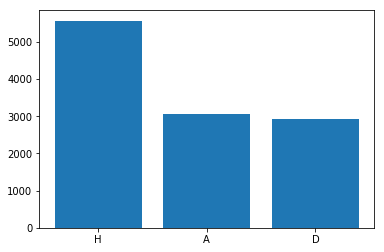

In [5]:
plt.bar(df['Res'].value_counts().keys(),df['Res'].value_counts())

### Nomes dos times

In [23]:
vocab = np.unique(np.concatenate((np.array(df['Home'].unique()), np.array(df['Away'].unique()))))

### Transformar em índices

In [24]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [25]:
def word2vector(word):
    m = np.zeros(len(word2idx))
    m[word2idx.get(word)] = 1
    return m

In [26]:
def text_to_vector2(text): 
    return word2idx.get(text, None)


In [27]:
# Transforma os dois times em um vetor com o flag do time correspondente
def prepare(H,A):
    vec = [text_to_vector2(H), text_to_vector2(A)]
    
    return vec
#     return np.array(vec).reshape(np.array(vec).shape[1]*2)

### Função para indexar os jogos

### Indexar os resultados

In [102]:
X = []
y = []

for ind_, row in df.iterrows():
    X.append([text_to_vector2(row['Home']), text_to_vector2(row['Away']),row['A_Goals_Scored']])            

    rv = [1,0,0] if row['Res'] == 'H' else [0,1,0] if row['Res'] == 'D' else [0,0,1] if row['Res'] == 'A' else [0,0,0]
    
    y.append(rv)
    
    
    

# y = np.array(y).reshape(np.array(y).shape[0],3)

X = np.array(X)

# Normalizar gols
# X[:,-4:-3] = X[:,-4:-3]/X[:,-4:-3].max()
# X[:,-3:-2] = X[:,-3:-2]/X[:,-3:-2].max()
# X[:,-2:-1] = X[:,-2:-1]/X[:,-2:-1].max()
X[:,-1:] = X[:,-1:]/X[:,-1:].max()

In [103]:
np.array(X).shape

(11560, 3)

### Separar os datasets de treinamento e teste

### Suport vector machine

In [82]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [91]:
model = MultiOutputClassifier(SVR(gamma='scale', C=5.0, epsilon=0.2))

### Treinar o modelo

In [133]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [104]:
split = 40

In [105]:
X_train, y_train, X_test, y_test = X[:-int(np.array(X).shape[0]/split)], y[:-int(np.array(y).shape[0]/split)], X[-int(np.array(X).shape[0]/split):], y[-int(np.array(y).shape[0]/split):]

In [106]:
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=None)

### Avaliar precisão

In [107]:
prec = []

i = 0

sl_ = []

for X_t in X_test:

    p = model.predict([X_t])      
    
    m = p.max()

    sl = [1,0,0] if p[0,0] == m else [0,1,0] if p[0,1] == m else [0,0,1] if p[0,2] == m else 'none'
    
    sl_.append([sl,y_test[i]])
    
    prec.append(1 if sl == y_test[i] else 0)
     
    i += 1
    

print(round((abs(np.mean(prec))) * 100,0), '%')

43.0 %


In [108]:
sl_

[[[0, 0, 1], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [0, 0, 1]],
 [[1, 0, 0], [0, 0, 1]],
 [[1, 0, 0], [0, 1, 0]],
 [[0, 1, 0], [0, 0, 1]],
 [[1, 0, 0], [0, 0, 1]],
 [[0, 1, 0], [0, 0, 1]],
 [[1, 0, 0], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [1, 0, 0]],
 [[0, 1, 0], [0, 1, 0]],
 [[1, 0, 0], [0, 1, 0]],
 [[1, 0, 0], [0, 0, 1]],
 [[0, 1, 0], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [0, 1, 0]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [0, 1, 0]],
 [[1, 0, 0], [0, 1, 0]],
 [[1, 0, 0], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[0, 1, 0], [0, 0, 1]],
 [[0, 0, 1], [1, 0, 0]],
 [[1, 0, 0], [0, 1, 0]],
 [[0, 0, 1], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [0, 0, 1]],
 [[1, 0, 0], [0, 1, 0]],
 [[0, 0, 1], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[0, 1, 0], [1, 0, 0]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [0, 0, 1]],
 [[1, 0, 0], [0, 0, 1]],
 [[1, 0, 0], [0, 0, 1]],
 [[0, 1, 0], [1, 0, 0]],


### Salvar o modelo

In [21]:
from sklearn.externals import joblib

In [22]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [23]:
model = joblib.load('model.joblib') 

### Lista de times

In [24]:
from flask import jsonify

In [25]:
d = {}

In [26]:
d['teams'] = vocab.tolist()

In [27]:
import json


In [28]:
json.dumps(d)

'{"teams": ["Palmeiras", "Sport Recife", "Figueirense", "Botafogo RJ", "Corinthians", "Internacional", "Ponte Preta", "Bahia", "Cruzeiro", "Vasco", "Atletico GO", "Flamengo RJ", "Portuguesa", "Nautico", "Atletico-MG", "Coritiba", "Santos", "Sao Paulo", "Fluminense", "Gremio", "Vitoria", "Criciuma", "Atletico-PR", "Goias", "Chapecoense-SC", "Avai", "Joinville", "Santa Cruz", "America MG", "Parana", "Ceara"]}'

In [77]:
vocab

array(['15 DE NOVEMBRO/RS', 'A B C/RN', 'AA RIOVERDENSE/GO', 'ABAETÉ/PA',
       'ABC/RN', 'ABC/RN JÚNIOR', 'AC RIOVERDENSE/GO', 'ADAP/PR',
       'AFRICA DO SUL', 'ALAVÉS/ESP', 'ALBÂNIA', 'ALECRIM SUB 20/RN',
       'ALECRIM/RN', 'ALEGRENSE/ES', 'ALEMANHA', 'AMADENSE/SE',
       'AMERICA/SP JÚNIOR', 'AMERICANO/RJ', 'AMIENS/FRA', 'AMPARO/SP',
       'AMÉRICA SUB 20/MG', 'AMÉRICA TEÓFILO OTONI/MG', 'AMÉRICA/MG',
       'AMÉRICA/MG JÚNIOR', 'AMÉRICA/PB', 'AMÉRICA/PE', 'AMÉRICA/RJ',
       'AMÉRICA/RN', 'AMÉRICA/SE', 'AMÉRICA/SP', 'ANANINDEUA/PA',
       'ANAPOLINA/GO', 'ANDORRA', 'ANGOLA', 'ANÁPOLIS/GO',
       'APARECIDENSE/GO', 'ARAGUAÍNA/TO', 'ARARIPINA/PE', 'ARAXÁ/MG',
       'ARAÇATUBA/SP', 'ARGENTINA', 'ARGÉLIA', 'ARIQUEMES/RO', 'ARMÊNIA',
       'ARSENAL/ING', 'ARÁBIA SAUDITA', 'AS ROMA/ITA', 'ASA/AL',
       'ASCOLI/ITA', 'ASSISENSE/SP', 'ASSU/RN', 'ASTON VILLA/ING',
       'ATALANTA BERGAMAS/ITA', 'ATALANTA/ITA', 'ATHLETIC BILBAO/ESP',
       'ATIBAIA/SP', 'ATLETICO ACREANO/AC',

### Realizar previsão

In [100]:
H = 'CORINTHIANS/SP'
A = 'PALMEIRAS/SP'

p = model.predict([[text_to_vector2(H), text_to_vector2(A),2]])

# if p < 0:
#     print(H, 'Vence com ', round(abs(p[0]),3),' gol de diferença')
# else:
#     print(A, 'Vence com', round(abs(p[0]),3),' gol de diferença')
print(p)

[[0.73442847 0.12048503 0.23687214]]


In [44]:
(p[0] - y[1]).mean()

0.5

In [42]:
y[1]

[1.0, 1.0]